In [318]:
import numpy as np

In [391]:
def gp(X, y, k, Xtest, noise=1e-6):
    X_m, X_n = X.shape
    K = k(X, X)
    
    L = np.linalg.cholesky(K + noise*np.eye(X_m)) # decompose K for inverse stability
    Kx = k(X, Xtest)
    LKx = np.linalg.solve(L, Kx) # Ax=b Lkx = L^-1 * Kx
    
    Kxx = k(Xtest, Xtest)

    mean = np.dot(LKx.T, np.linalg.solve(L, y)) # L*^T * (L^-1 *y)
    var = np.diag(Kxx) - np.sum(LKx**2, axis=0) # variance of f*
    # loglike = - 1/2 * y.T * a - np.trace(np.log(L)) - X_n / 2 * np.log(2 * np.pie) # likelihood of f*
    
    LKxx = np.linalg.cholesky(Kxx + 1e-6 * np.eye(Xtest.shape[0]) - np.dot(LKx.T, LKx))
    f_posterior = test_mean + np.dot(LKxx, np.random.normal(size=(Xtest.shape[0], 40)))

    return mean, var, f_posterior

In [392]:
def RBF(a, b, l=0.3, sigma=1.0):
    dotprod = np.sum(a**2,axis=1).reshape(-1,1) + np.sum(b**2,1) - 2*np.dot(a, b.T)
 
    return sigma**2 * np.exp((-1/(2 *(l**2))) * dotprod)

In [393]:
n_train = 30
n_test = 100

f = lambda x: np.sin(x)

X = np.random.uniform(-5, 5, size=(n_train, 1))
y = f(X)

Xtest = np.linspace(-5, 5, n_test).reshape(-1,1)

In [394]:
import matplotlib.pyplot as plt

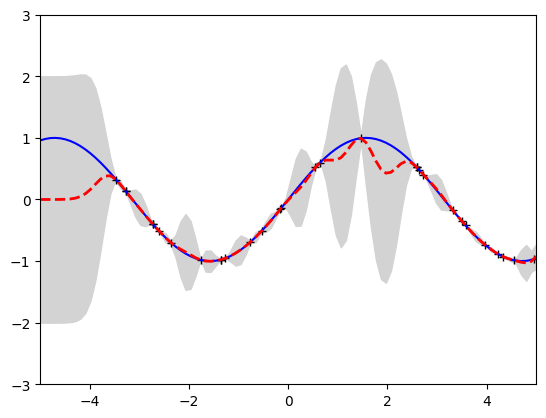

In [395]:
plt.plot(X, y, 'k+')
plt.axis([-5, 5, -3, 3])
plt.plot(Xtest, f(Xtest),'b-')
test_mean, test_var, f_posterior = gp(X, y, RBF, Xtest)
test_std = np.sqrt(test_var)
plt.gca().fill_between(Xtest.flatten(), test_mean.flatten() - 2*test_std, test_mean.flatten() + 2*test_std, color="lightgrey")
plt.plot(Xtest, test_mean, 'r--', lw=2)


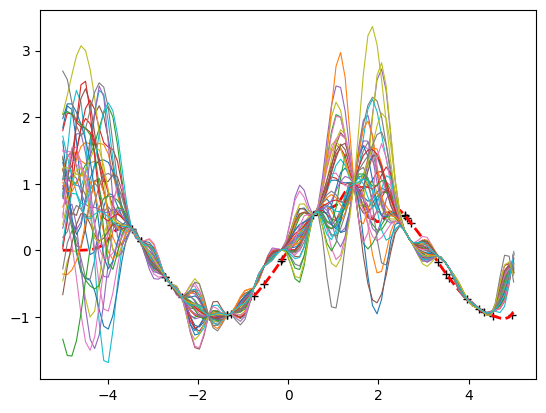

In [396]:
plt.clf()
plt.plot(X, y, 'k+')
plt.plot(Xtest, test_mean, 'r--', linewidth=2)
plt.plot(Xtest, f_posterior, linewidth=0.8)
plt.show()